In [ ]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LassoCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.datasets import load_diabetes
from google.colab import drive
drive.mount('/content/drive/')

import warnings
warnings.filterwarnings("ignore")

Mounted at /content/drive/


# Using Lasso regression for feature selection
## Test using diabetes dataset

In [ ]:
# Load diabete dataset
diab = load_diabetes()
scaler = StandardScaler()
diab_sc = scaler.fit_transform(np.concatenate((diab["data"], diab["target"].reshape(-1, 1)), axis=1))
X = diab_sc[:, :-1]
Y = diab_sc[:, -1]
labels = diab["feature_names"]

In [ ]:
X.shape

(442, 10)

In [ ]:
model_lasso = LassoCV(alphas = [0.1,1,0.001, 0.0005]).fit(X,Y)
print(model_lasso.alpha_)
coef = pd.Series(model_lasso.coef_, index = labels)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
print(coef.sort_values(ascending=False))
sort_coef = abs(coef).sort_values(ascending=False)
print(sort_coef.index)

0.001
Lasso picked 9 variables and eliminated the other 1 variables
s5     0.414145
bmi    0.322224
bp     0.198352
s2     0.187603
s4     0.088500
s6     0.041307
s3     0.000000
age   -0.004050
sex   -0.145848
s1    -0.352488
dtype: float64
Index(['s5', 's1', 'bmi', 'bp', 's2', 'sex', 's4', 's6', 'age', 's3'], dtype='object')


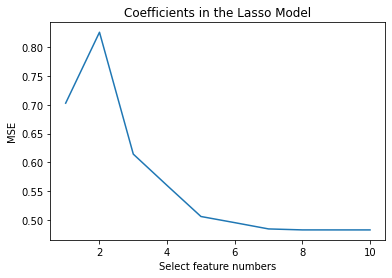

In [ ]:
sort_coef_idx = []
for i in range(len(sort_coef.index)):
  sort_coef_idx.append(labels.index(sort_coef.index[i]))

MSE_diab = []
for i in range(len(sort_coef_idx)):
  X_select = X.T[sort_coef_idx[:i+1]]
  coef_select = coef.values[sort_coef_idx[:i+1]]
  Y_pred_sel = np.sum(X_select * coef_select.reshape(i+1, 1), axis=0)
  MSE_diab.append(mean_squared_error(Y, Y_pred_sel))

plt.figure()
plt.title("Coefficients in the Lasso Model")
plt.plot(range(1, len(MSE_diab)+1), MSE_diab)
plt.xlabel('Select feature numbers')
plt.ylabel('MSE')
plt.show()

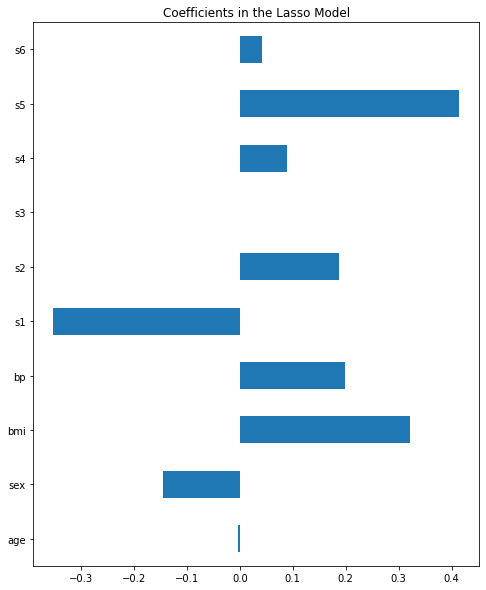

In [ ]:
imp_coef = pd.concat([coef.sort_values().head(3), coef.sort_values().tail(3)])

plt.figure(figsize=(8, 10))
coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show() 

In [ ]:
clf = Lasso()
coefs = []
idx_sel = []
fea_sel = []
alphas = np.logspace(-6, 2, 200)

for a in alphas:
    clf.set_params(alpha = a)
    clf.fit(X, Y)
    coefs.append(clf.coef_)
    for coef in range(len(clf.coef_)):
        if clf.coef_[coef] == 0 and coef not in idx_sel:
            idx_sel.append(coef)
            fea_sel.append(labels[coef])
fea_sel.reverse()

In [ ]:
fea_sel

['bmi', 's5', 'bp', 'sex', 's6', 's1', 's4', 's2', 'age', 's3']

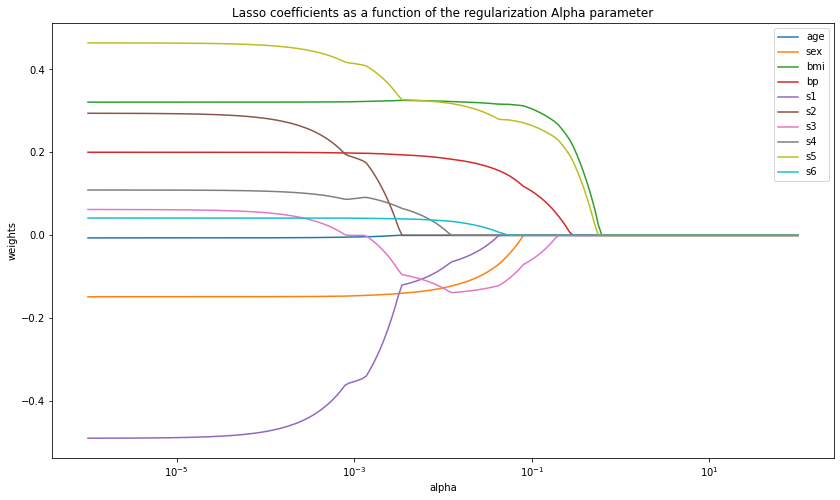

In [ ]:
plt.figure(figsize=(14, 8))
ax = plt.gca()
for i in range(10):
  ax.plot(alphas, np.array(coefs).T[i], label=diab.feature_names[i])
  ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization Alpha parameter')
plt.axis('tight')
plt.legend()
plt.show()

## Test using Real dataset

In [ ]:
file_path = 'Absolute path of file PingAnBank_daily.xlsx'
full_dataset = pd.read_excel(file_path)
labels = full_dataset.columns.values[2:].tolist()
fs_data = full_dataset.values[:, 1:]
n_select = 5

sc = StandardScaler()
train_sc = sc.fit_transform(fs_data)

y = train_sc[:, 0]
X = train_sc[:, 1:]

In [ ]:
X.shape

(4112, 30)

In [ ]:
model_lasso = LassoCV(alphas = [0.1,1,0.001, 0.0005]).fit(X,y)
print(model_lasso.alpha_)
coef = pd.Series(model_lasso.coef_, index = labels)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
print(coef.sort_values(ascending=False))
sort_coef = abs(coef).sort_values(ascending=False)
print(sort_coef.values)

0.0005
Lasso picked 17 variables and eliminated the other 13 variables
open                               0.457576
high                               0.453660
low                                0.041733
circulating_market_cap             0.023618
market_cap                         0.019186
MAC10                              0.016653
price_no_fq                        0.008732
EBIT                               0.002119
OperateNetIncome                   0.000993
MAC120                             0.000827
financial_assets                   0.000274
MAC60                              0.000108
EMAC120                            0.000000
non_recurring_gain_loss           -0.000000
MAC5                               0.000000
EMAC20                             0.000000
EBITDA                            -0.000000
interest_free_current_liability   -0.000000
EMAC12                             0.000000
MAC20                              0.000000
EMAC26                             0.000000
opera

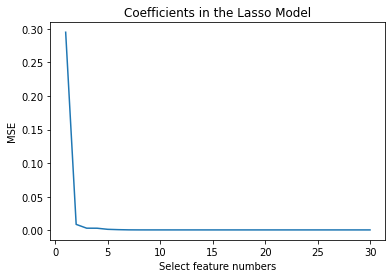

In [ ]:
sort_coef_idx = []
for i in range(len(sort_coef.index)):
  sort_coef_idx.append(labels.index(sort_coef.index[i]))

MSE_stock = []
for i in range(len(sort_coef_idx)):
  X_select = X.T[sort_coef_idx[:i+1]]
  coef_select = coef.values[sort_coef_idx[:i+1]]
  Y_pred_sel = np.sum(X_select * coef_select.reshape(i+1, 1), axis=0)

  MSE_stock.append(mean_squared_error(y, Y_pred_sel))

plt.figure()
plt.title("Coefficients in the Lasso Model")
plt.plot(range(1, len(MSE_stock)+1), MSE_stock)
plt.xlabel('Select feature numbers')
plt.ylabel('MSE')
plt.show()

In [ ]:
sort_coef = abs(coef).sort_values(ascending=False)

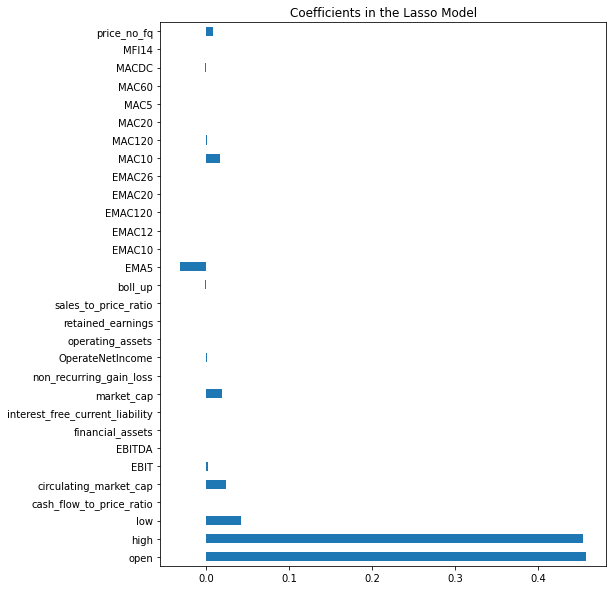

In [ ]:
imp_coef = pd.concat([coef.sort_values().head(3), coef.sort_values().tail(3)])

plt.figure(figsize=(8, 10))
coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show() 

In [ ]:
select_feature = Lasso(max_iter=5000)
coefs = []
feat_sel_PA = []
sel_feature = []
alphas = np.logspace(-10, 1, 200)

for a in alphas:
    select_feature.set_params(alpha = a)
    select_feature.fit(X, y)
    coefs.append(select_feature.coef_)
    for coef in range(len(select_feature.coef_)):
        if select_feature.coef_[coef] == 0 and coef not in feat_sel_PA:
            feat_sel_PA.append(coef)

feat_sel_PA.reverse()
for idx in feat_sel_PA[:n_select]:
  sel_feature.append(labels[idx])

In [ ]:
sel_feature

NameError: ignored

Only factors

In [ ]:
file_path = '/content/drive/MyDrive/EC503/Coding/DataSource/PingAn Bank 2005-2021/factors_basics.xlsx'
full_dataset = pd.read_excel(file_path)
labels = full_dataset.columns.values[2:].tolist()
fs_data = full_dataset.values[:, 1:]
n_select = 5

sc = StandardScaler()
train_sc = sc.fit_transform(fs_data)

y = train_sc[:, 0]
X = train_sc[:, 1:]

In [ ]:
X.shape

(2492, 129)

In [ ]:
model_lasso = LassoCV(alphas = [0.1,1,0.001, 0.0005, 0.0001]).fit(X,y)
print(model_lasso.alpha_)
coef = pd.Series(model_lasso.coef_, index = labels)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
print(coef.sort_values(ascending=False))
sort_coef = abs(coef).sort_values(ascending=False)
print(sort_coef.values)

0.001
Lasso picked 39 variables and eliminated the other 90 variables
market_cap                      0.723287
circulating_market_cap          0.163143
Price1Y                         0.057111
ATR14                           0.039391
Variance120                     0.032053
                                  ...   
EMAC120                        -0.008587
EBITDA                         -0.011915
non_operating_net_profit_ttm   -0.014213
net_interest_expense           -0.019452
VEMA26                         -0.030045
Length: 129, dtype: float64
[7.23286906e-01 1.63143382e-01 5.71107541e-02 3.93911435e-02
 3.20534721e-02 3.00453051e-02 1.94524641e-02 1.91105252e-02
 1.42127294e-02 1.37610413e-02 1.36272433e-02 1.33632613e-02
 1.19148770e-02 9.76861711e-03 9.15194480e-03 8.58700544e-03
 8.27017310e-03 6.70954906e-03 5.94352360e-03 5.68055314e-03
 5.38242160e-03 3.74874235e-03 3.63102679e-03 3.40890919e-03
 3.08180463e-03 2.08213104e-03 2.00663595e-03 1.71636702e-03
 1.00462776e-03 8.937941

In [ ]:
print(sort_coef.index)

Index(['market_cap', 'circulating_market_cap', 'Price1Y', 'ATR14',
       'Variance120', 'VEMA26', 'net_interest_expense',
       'net_invest_cash_flow_ttm', 'non_operating_net_profit_ttm', 'PEG',
       ...
       'BIAS5', 'BIAS60', 'bull_power', 'CCI10', 'CCI15', 'CCI20', 'CCI88',
       'CR20', 'PLRC12', 'asset_impairment_loss_ttm'],
      dtype='object', length=129)


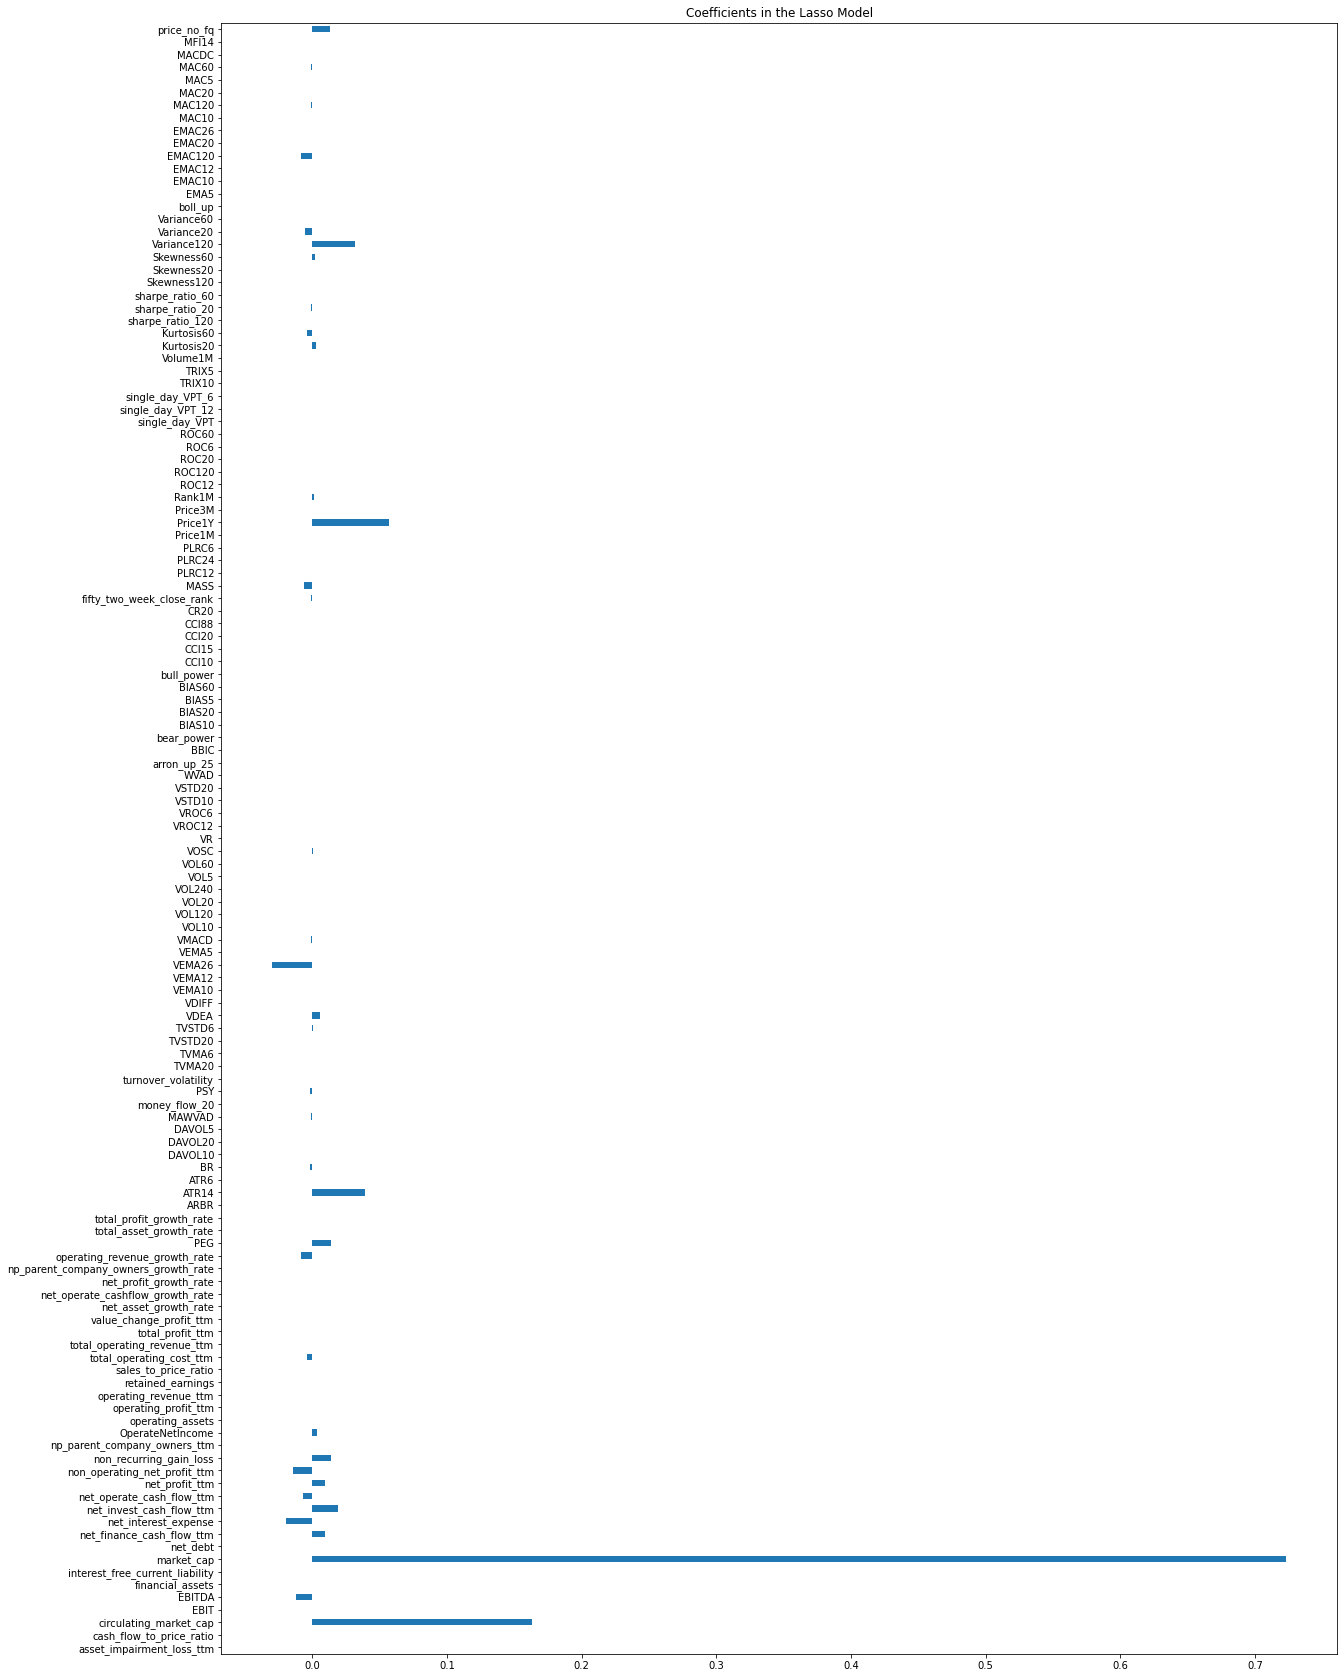

In [ ]:
sort_coef = abs(coef).sort_values(ascending=False)
imp_coef = pd.concat([coef.sort_values().head(3), coef.sort_values().tail(3)])

plt.figure(figsize=(20, 30))
coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show() 

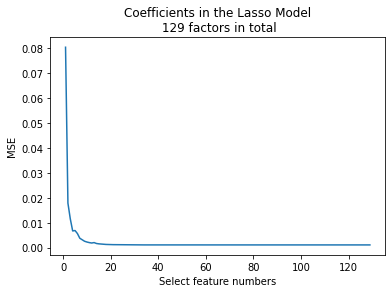

In [ ]:
sort_coef_idx = []
for i in range(len(sort_coef.index)):
  sort_coef_idx.append(labels.index(sort_coef.index[i]))

MSE_stock = []
for i in range(len(sort_coef_idx)):
  X_select = X.T[sort_coef_idx[:i+1]]
  coef_select = coef.values[sort_coef_idx[:i+1]]
  Y_pred_sel = np.sum(X_select * coef_select.reshape(i+1, 1), axis=0)

  MSE_stock.append(mean_squared_error(y, Y_pred_sel))

plt.figure()
plt.title("Coefficients in the Lasso Model\n 129 factors in total")
plt.plot(range(1, len(MSE_stock)+1), MSE_stock)
plt.xlabel('Select feature numbers')
plt.ylabel('MSE')
plt.show()

Plot part

In [ ]:
plt.figure(figsize=(20, 20))
ax = plt.gca()
for i in range(len(labels)):
  ax.plot(alphas, np.array(coefs).T[i], label=labels[i])
  ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization Alpha parameter')
plt.axis('tight')
plt.legend()
plt.show()

Tranfer selected feature into csv file

In [ ]:
print(sort_coef.index.tolist())

['market_cap', 'circulating_market_cap', 'Price1Y', 'ATR14', 'Variance120', 'VEMA26', 'net_interest_expense', 'net_invest_cash_flow_ttm', 'non_operating_net_profit_ttm', 'PEG', 'non_recurring_gain_loss', 'price_no_fq', 'EBITDA', 'net_profit_ttm', 'net_finance_cash_flow_ttm', 'EMAC120', 'operating_revenue_growth_rate', 'net_operate_cash_flow_ttm', 'MASS', 'VDEA', 'Variance20', 'Kurtosis60', 'total_operating_cost_ttm', 'OperateNetIncome', 'Kurtosis20', 'Skewness60', 'BR', 'PSY', 'Rank1M', 'sharpe_ratio_20', 'VMACD', 'MAC60', 'fifty_two_week_close_rank', 'MAC120', 'MAWVAD', 'TVSTD6', 'VOSC', 'ROC60', 'net_operate_cashflow_growth_rate', 'DAVOL20', 'DAVOL10', 'VEMA12', 'money_flow_20', 'DAVOL5', 'VEMA10', 'VDIFF', 'turnover_volatility', 'TVMA20', 'TVMA6', 'TVSTD20', 'ATR6', 'total_profit_ttm', 'ARBR', 'total_profit_growth_rate', 'cash_flow_to_price_ratio', 'EBIT', 'financial_assets', 'interest_free_current_liability', 'net_debt', 'np_parent_company_owners_ttm', 'operating_assets', 'operatin

In [ ]:
dataset_date_close = full_dataset[['Date', 'close']]
dataset_others = full_dataset[sort_coef.index.tolist()[:9]]
dataset_sel_feat = pd.concat([dataset_date_close, dataset_others], axis = 1)

In [ ]:

print(dataset_sel_feat)

           Date  close  ...  net_invest_cash_flow_ttm  non_operating_net_profit_ttm
0    2011-09-01   5.44  ...              -34491077120                      97499000
1    2011-09-02   5.44  ...              -34491077120                      97499000
2    2011-09-05   5.28  ...              -34491077120                      97499000
3    2011-09-06   5.25  ...              -34491077120                      97499000
4    2011-09-07   5.35  ...              -34491077120                      97499000
...         ...    ...  ...                       ...                           ...
2487 2021-11-29  17.51  ...              -29970000192                    -100000000
2488 2021-11-30  17.44  ...              -29970000192                    -100000000
2489 2021-12-01  17.64  ...              -29970000192                    -100000000
2490 2021-12-02  17.59  ...              -29970000192                    -100000000
2491 2021-12-03  17.65  ...              -29970000192                    -10

In [ ]:
dataset_sel_feat.to_csv("/content/drive/MyDrive/EC503/Coding/DataSource/PingAn Bank 2005-2021/PingAnBank_select_features_only_factors.csv" ,index=False, sep=',')